<a href="https://colab.research.google.com/github/TanmayBj23/BIS_LAB/blob/main/Parallel_Cellular_Traffic_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import concurrent.futures

# Step 1: Define the Optimization Problem (Objective Function)
def optimization_function(cell_position):
    # Example: Minimize the function f(x) = x^2 (simple quadratic function)
    return cell_position**2

# Step 2: Initialize Parameters
GRID_SIZE = 10  # Define grid size (NxN)
NUM_CELLS = GRID_SIZE * GRID_SIZE  # Total number of cells
NUM_ITERATIONS = 10  # Number of iterations
NEIGHBORHOOD = 8  # Number of neighbors (e.g., 8 for Moore neighborhood)

# Step 3: Initialize Population
class Cell:
    def __init__(self, position):
        self.position = position  # Position in the solution space
        self.fitness = optimization_function(position)  # Fitness of the cell

def generate_random_position():
    # Random initialization within a certain range (for simplicity, using range -10 to 10)
    return random.uniform(-10, 10)

# Create the grid of cells
grid = np.array([[Cell(generate_random_position()) for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)])

# Step 4: Evaluate Fitness
def evaluate_fitness(cell):
    cell.fitness = optimization_function(cell.position)

# Step 5: Update States (Interaction with Neighbors)
def update_cell_state(cell, neighbors):
    best_neighbor = find_best_neighbor(neighbors)
    cell.position = best_neighbor.position
    evaluate_fitness(cell)

def find_best_neighbor(neighbors):
    best_fitness = float('inf')
    best_neighbor = None
    for neighbor in neighbors:
        if neighbor.fitness < best_fitness:
            best_fitness = neighbor.fitness
            best_neighbor = neighbor
    return best_neighbor

def get_neighbors(cell, grid):
    row, col = np.where(grid == cell)
    neighbors = []

    # Check all 8 neighbors in the Moore neighborhood
    for i in range(max(0, row[0]-1), min(GRID_SIZE, row[0]+2)):
        for j in range(max(0, col[0]-1), min(GRID_SIZE, col[0]+2)):
            if (i, j) != (row[0], col[0]):
                neighbors.append(grid[i][j])
    return neighbors

# Step 6: Iterate (Main Loop)
def parallel_cell_update(grid):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for row in grid:
            for cell in row:
                neighbors = get_neighbors(cell, grid)
                futures.append(executor.submit(update_cell_state, cell, neighbors))

        # Wait for all futures to complete
        concurrent.futures.wait(futures)

# Step 7: Output the Best Solution
def find_best_solution(grid):
    best_fitness = float('inf')
    best_cell = None
    for row in grid:
        for cell in row:
            if cell.fitness < best_fitness:
                best_fitness = cell.fitness
                best_cell = cell
    return best_cell

def convergence_condition_met(best_cell, threshold=0.01):
    # Check if the fitness improvement is smaller than a threshold
    return best_cell.fitness < threshold

# Main execution loop
best_cell_overall = None
for iteration in range(NUM_ITERATIONS):
    # Parallel update step: Update all cells based on neighbors
    parallel_cell_update(grid)

    # Find the best cell in the grid after the update
    best_cell = find_best_solution(grid)

    # Track the best solution overall
    if best_cell_overall is None or best_cell.fitness < best_cell_overall.fitness:
        best_cell_overall = best_cell

    # Print iteration info
    print(f"Iteration {iteration + 1}: Best Fitness = {best_cell_overall.fitness}")

    # Check for convergence (optional)
    if convergence_condition_met(best_cell_overall):
        print("Convergence met, stopping early.")
        break

# Output the final best solution
print(f"Best Solution Found: Position = {best_cell_overall.position}, Fitness = {best_cell_overall.fitness}")


Iteration 1: Best Fitness = 0.018591115906819673
Iteration 2: Best Fitness = 0.018591115906819673
Iteration 3: Best Fitness = 0.018591115906819673
Iteration 4: Best Fitness = 0.018591115906819673
Iteration 5: Best Fitness = 0.018591115906819673
Iteration 6: Best Fitness = 0.018591115906819673
Iteration 7: Best Fitness = 0.018591115906819673
Iteration 8: Best Fitness = 0.018591115906819673
Iteration 9: Best Fitness = 0.018591115906819673
Iteration 10: Best Fitness = 0.018591115906819673
Best Solution Found: Position = -0.13634924241380908, Fitness = 0.018591115906819673


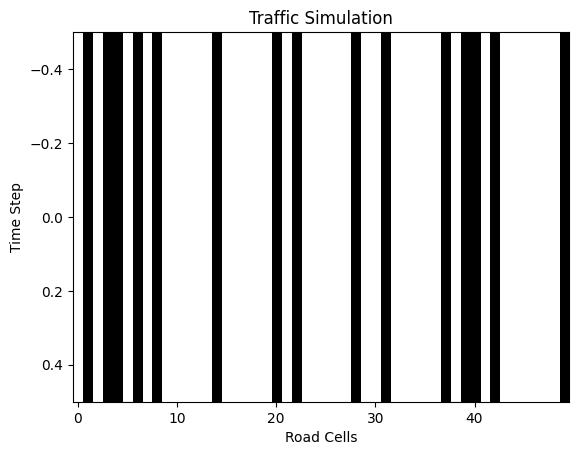

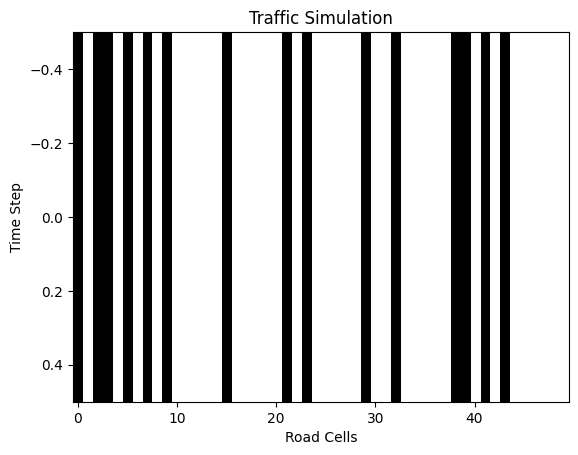

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

def initialize_road(length, car_density):
    """
    Initialize the road with cars based on the given density.
    :param length: Length of the road.
    :param car_density: Fraction of cells occupied by cars.
    :return: 1D numpy array representing the road.
    """
    road = np.zeros(length, dtype=int)
    num_cars = int(car_density * length)
    car_positions = np.random.choice(length, num_cars, replace=False)
    road[car_positions] = 1
    return road

def update_road(road):
    """
    Update the road based on cellular automata rules.
    :param road: Current state of the road.
    :return: Updated state of the road.
    """
    new_road = road.copy()
    for i in range(len(road)):
        if road[i] == 1 and road[(i + 1) % len(road)] == 0:  # Check if the next cell is empty
            new_road[i] = 0
            new_road[(i + 1) % len(road)] = 1
    return new_road

def simulate_traffic(length, car_density, steps, display=True):
    """
    Simulate traffic flow using cellular automata.
    :param length: Length of the road.
    :param car_density: Fraction of cells occupied by cars.
    :param steps: Number of simulation steps.
    :param display: Whether to display the simulation.
    """
    road = initialize_road(length, car_density)
    history = [road.copy()]

    for _ in range(steps):
        road = update_road(road)
        history.append(road.copy())

        if display:
            plt.imshow([road], cmap="binary", aspect="auto")
            plt.title("Traffic Simulation")
            plt.xlabel("Road Cells")
            plt.ylabel("Time Step")
            plt.pause(0.1)

    if display:
        plt.show()

    return history

if __name__ == "__main__":
    # Simulation parameters
    road_length = 50       # Number of cells
    car_density = 0.3      # Fraction of road occupied by cars
    time_steps = 2        # Number of time steps to simulate

    # Run the simulation
    traffic_history = simulate_traffic(road_length, car_density, time_steps)
